# Diffusion Limited Aggregates (DLA)

In this notebook, we generate self-affine fractal patterns using Python. 

Specifically, we will create Diffusion Limited Aggregation (DLA) models that resemble an e-coli community, a lichen, a saprophyte, and a bryophyte.

## E. coli & 

[Tronnolone et al. 2018](https://doi.org/10.1038/s41598-018-23649-z) 

To simulate the diffusion-limited aggregation (DLA) of bacterial cells, we can implement a model where bacterial cells "diffuse" randomly until they stick to a growing cluster that begins from a central seed. The DLA process leads to fractal-like growth patterns, which we can simulate using Python and Matplotlib for visualization.

Here’s a simple Python implementation to simulate this:

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor, as_completed

# Parameters for the simulation
cluster_radius_limit = 100.0  # Maximum radius the cluster can grow to before walkers are removed
num_walkers = 5000            # Number of random walkers in the simulation
stick_distance = 1.5          # Distance at which a walker sticks to the cluster
center = np.array([0.0, 0.0])  # Center of the simulation

# List of particle positions (start with one particle at the center)
cluster = [center.copy()]

def random_walk():
    """ Perform random walk in continuous 2D space until the particle sticks to the cluster. """
    # Start at a random point on a circle just outside the current cluster radius
    angle = 2 * np.pi * np.random.random()
    r = cluster_radius_limit - 10  # Start walkers near the radius limit
    x, y = r * np.cos(angle), r * np.sin(angle)
    walker = np.array([x, y])

    while True:
        # Calculate distance to origin (if too far, remove walker)
        if np.linalg.norm(walker) > cluster_radius_limit:
            return None
        
        # Check if the walker is near any particle in the cluster
        for particle in cluster:
            if np.linalg.norm(walker - particle) < stick_distance:
                return walker

        # Move the walker in a random direction
        angle = 2 * np.pi * np.random.random()  # Random direction
        step_size = np.random.uniform(0.8, 1.2)  # Variable step size
        walker[0] += step_size * np.cos(angle)
        walker[1] += step_size * np.sin(angle)

def simulate_dla_parallel(num_walkers, max_workers=8):
    """ Simulate the diffusion-limited aggregation process in parallel. """
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = [executor.submit(random_walk) for _ in range(num_walkers)]
        for future in as_completed(futures):
            result = future.result()
            if result is not None:
                cluster.append(result)
    
    # Extract X and Y coordinates of all particles in the cluster
    cluster_coords = np.array(cluster)
    x_coords = cluster_coords[:, 0]
    y_coords = cluster_coords[:, 1]

    # Plot the resulting cluster
    plt.figure(figsize=(8, 8))
    plt.scatter(x_coords, y_coords, s=1, color='black')
    plt.title(f'Diffusion-Limited Aggregation with {num_walkers} Walkers (Parallel)')
    plt.axis('equal')
    plt.show()

# Run the parallel simulation
simulate_dla_parallel(num_walkers)


KeyboardInterrupt: 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from multiprocessing import Pool, cpu_count

# Parameters for the simulation
cluster_radius_limit = 100.0  # Maximum radius the cluster can grow to before walkers are removed
num_walkers = 5000            # Number of random walkers to simulate
stick_distance = 1.5          # Distance at which a walker sticks to the cluster
center = np.array([0.0, 0.0])  # Center of the simulation
batch_size = 100              # Number of walkers to simulate in each batch

# Initialize cluster with one particle at the center
cluster = [center.copy()]

def random_walk(args):
    """Perform random walk until the particle sticks to the cluster."""
    cluster_positions, stick_distance, cluster_radius_limit = args
    cluster_tree = cKDTree(cluster_positions)
    angle = 2 * np.pi * np.random.random()
    r = cluster_radius_limit - 10  # Start walkers near the radius limit
    x, y = r * np.cos(angle), r * np.sin(angle)
    walker = np.array([x, y], dtype=np.float64)

    while True:
        # Check if the walker is within the cluster radius limit
        if np.hypot(walker[0], walker[1]) > cluster_radius_limit:
            return None

        # Check if the walker is near any particle in the cluster
        indices = cluster_tree.query_ball_point(walker, stick_distance)
        if indices:
            return walker

        # Move the walker in a random direction
        angle = 2 * np.pi * np.random.random()  # Random direction
        step_size = np.random.uniform(0.8, 1.2)  # Variable step size
        walker[0] += step_size * np.cos(angle)
        walker[1] += step_size * np.sin(angle)

def simulate_dla(num_walkers, stick_distance, cluster_radius_limit, batch_size=100):
    """Simulate the diffusion-limited aggregation process."""
    cluster = [np.array([0.0, 0.0], dtype=np.float64)]
    num_particles = 1  # Start with the seed particle

    while num_particles < num_walkers:
        cluster_positions = np.array(cluster)
        args_list = [(cluster_positions, stick_distance, cluster_radius_limit)] * batch_size

        with Pool(processes=cpu_count()) as pool:
            results = pool.map(random_walk, args_list)

        # Add new particles that stuck to the cluster
        new_particles = [walker for walker in results if walker is not None]
        cluster.extend(new_particles)
        num_particles += len(new_particles)
        print(f'Number of particles in cluster: {num_particles}')

    return np.array(cluster[:num_walkers])

# Run the simulation
cluster = simulate_dla(num_walkers, stick_distance, cluster_radius_limit, batch_size)

# Extract X and Y coordinates of all particles in the cluster
x_coords = cluster[:, 0]
y_coords = cluster[:, 1]

# Plot the resulting cluster
plt.figure(figsize=(8, 8))
plt.scatter(x_coords, y_coords, s=1, color='black')
plt.title(f'Diffusion-Limited Aggregation with {num_walkers} Walkers (Parallelized)')
plt.axis('equal')
plt.show()


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1m[1mFailed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1m[1mFailed in nopython mode pipeline (step: native parfor lowering)
[1mFailed in full_parfor_gufunc mode pipeline (step: nopython frontend)
[1m[1mNo implementation of function Function(<built-in function iadd>) found for signature:
 
 >>> iadd(float64, array(float64, 1d, C))
 
There are 18 candidate implementations:
[1m  - Of which 16 did not match due to:
  Overload of function 'iadd': File: <numerous>: Line N/A.
    With argument(s): '(float64, array(float64, 1d, C))':[0m
[1m   No match.[0m
[1m  - Of which 2 did not match due to:
  Operator Overload in function 'iadd': File: unknown: Line unknown.
    With argument(s): '(float64, array(float64, 1d, C))':[0m
[1m   No match for registered cases:
    * (int64, int64) -> int64
    * (int64, uint64) -> int64
    * (uint64, int64) -> int64
    * (uint64, uint64) -> uint64
    * (float32, float32) -> float32
    * (float64, float64) -> float64
    * (complex64, complex64) -> complex64
    * (complex128, complex128) -> complex128[0m
[0m
[0m[1mDuring: typing of intrinsic-call at /Users/tswetnam/github/fractal-notebooks/.venv/lib/python3.11/site-packages/numba/parfors/parfor.py (283)[0m
[1m
File "../../.venv/lib/python3.11/site-packages/numba/parfors/parfor.py", line 283:[0m
[1m        def sum_1(in_arr):
            <source elided>
            for i in numba.parfors.parfor.internal_prange(len(in_arr)):
[1m                val += in_arr[i]
[0m                [1m^[0m[0m

[0m[1mDuring: lowering "id=5[LoopNest(index_variable = parfor_index.273, range = (0, p1_size0.271, 1))]{1636: <ir.Block at /var/folders/l4/d18992bj657ctzkbchnx_s5h0000gp/T/ipykernel_59340/3949247615.py (17)>}Var(parfor_index.273, 3949247615.py:17)" at /var/folders/l4/d18992bj657ctzkbchnx_s5h0000gp/T/ipykernel_59340/3949247615.py (17)[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function distance at 0x126207ba0>))[0m
[0m[1mDuring: typing of call at /var/folders/l4/d18992bj657ctzkbchnx_s5h0000gp/T/ipykernel_59340/3949247615.py (35)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function distance at 0x126207ba0>))[0m
[0m[1mDuring: typing of call at /var/folders/l4/d18992bj657ctzkbchnx_s5h0000gp/T/ipykernel_59340/3949247615.py (35)
[0m
[1m
File "../../../../../../var/folders/l4/d18992bj657ctzkbchnx_s5h0000gp/T/ipykernel_59340/3949247615.py", line 35:[0m
[1m<source missing, REPL/exec in use?>[0m

[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function random_walk at 0x126205c60>))[0m
[0m[1mDuring: typing of call at /var/folders/l4/d18992bj657ctzkbchnx_s5h0000gp/T/ipykernel_59340/3949247615.py (49)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function random_walk at 0x126205c60>))[0m
[0m[1mDuring: typing of call at /var/folders/l4/d18992bj657ctzkbchnx_s5h0000gp/T/ipykernel_59340/3949247615.py (49)
[0m
[1m
File "../../../../../../var/folders/l4/d18992bj657ctzkbchnx_s5h0000gp/T/ipykernel_59340/3949247615.py", line 49:[0m
[1m<source missing, REPL/exec in use?>[0m


## DLA resembling a lichen

## Lichen

## Saprophyte

## Bryophyte

Note: While GPU acceleration can significantly speed up computations, implementing DLA on a GPU is challenging due to the inherently serial and random nature of the algorithm. Therefore, we will use Numba's Just-In-Time (JIT) compilation to optimize our code for better performance.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange


In [2]:
# Grid size
grid_size = 1000

# Number of particles
num_particles = 200000

# Maximum steps per particle
max_steps = 1000000

# Initialize the grid
grid = np.zeros((grid_size, grid_size), dtype=np.float64)

# Set the seed particle at the center
center = grid_size // 2
grid[center, center] = 1


In [3]:
@njit(parallel=True)
def dla_simulation(grid, num_particles, max_steps):
    grid_size = grid.shape[0]
    center = grid_size // 2

    for n in prange(num_particles):
        # Start the particle at a random position on the boundary
        angle = 2 * np.pi * np.random.rand()
        x = int(center + (grid_size // 2 - 1) * np.cos(angle))
        y = int(center + (grid_size // 2 - 1) * np.sin(angle))

        for _ in range(max_steps):
            # Random movement
            direction = np.random.randint(4)
            if direction == 0 and x > 0:
                x -= 1  # Left
            elif direction == 1 and x < grid_size - 1:
                x += 1  # Right
            elif direction == 2 and y > 0:
                y -= 1  # Up
            elif direction == 3 and y < grid_size - 1:
                y += 1  # Down

            # Check if the particle is adjacent to the cluster
            if (grid[(x - 1) % grid_size, y] == 1 or
                grid[(x + 1) % grid_size, y] == 1 or
                grid[x, (y - 1) % grid_size] == 1 or
                grid[x, (y + 1) % grid_size] == 1):
                grid[x, y] = 1
                break
            # If the particle moves out of bounds, reposition it
            if x <= 0 or x >= grid_size - 1 or y <= 0 or y >= grid_size - 1:
                break


In [4]:
# Run the DLA simulation
dla_simulation(grid, num_particles, max_steps)


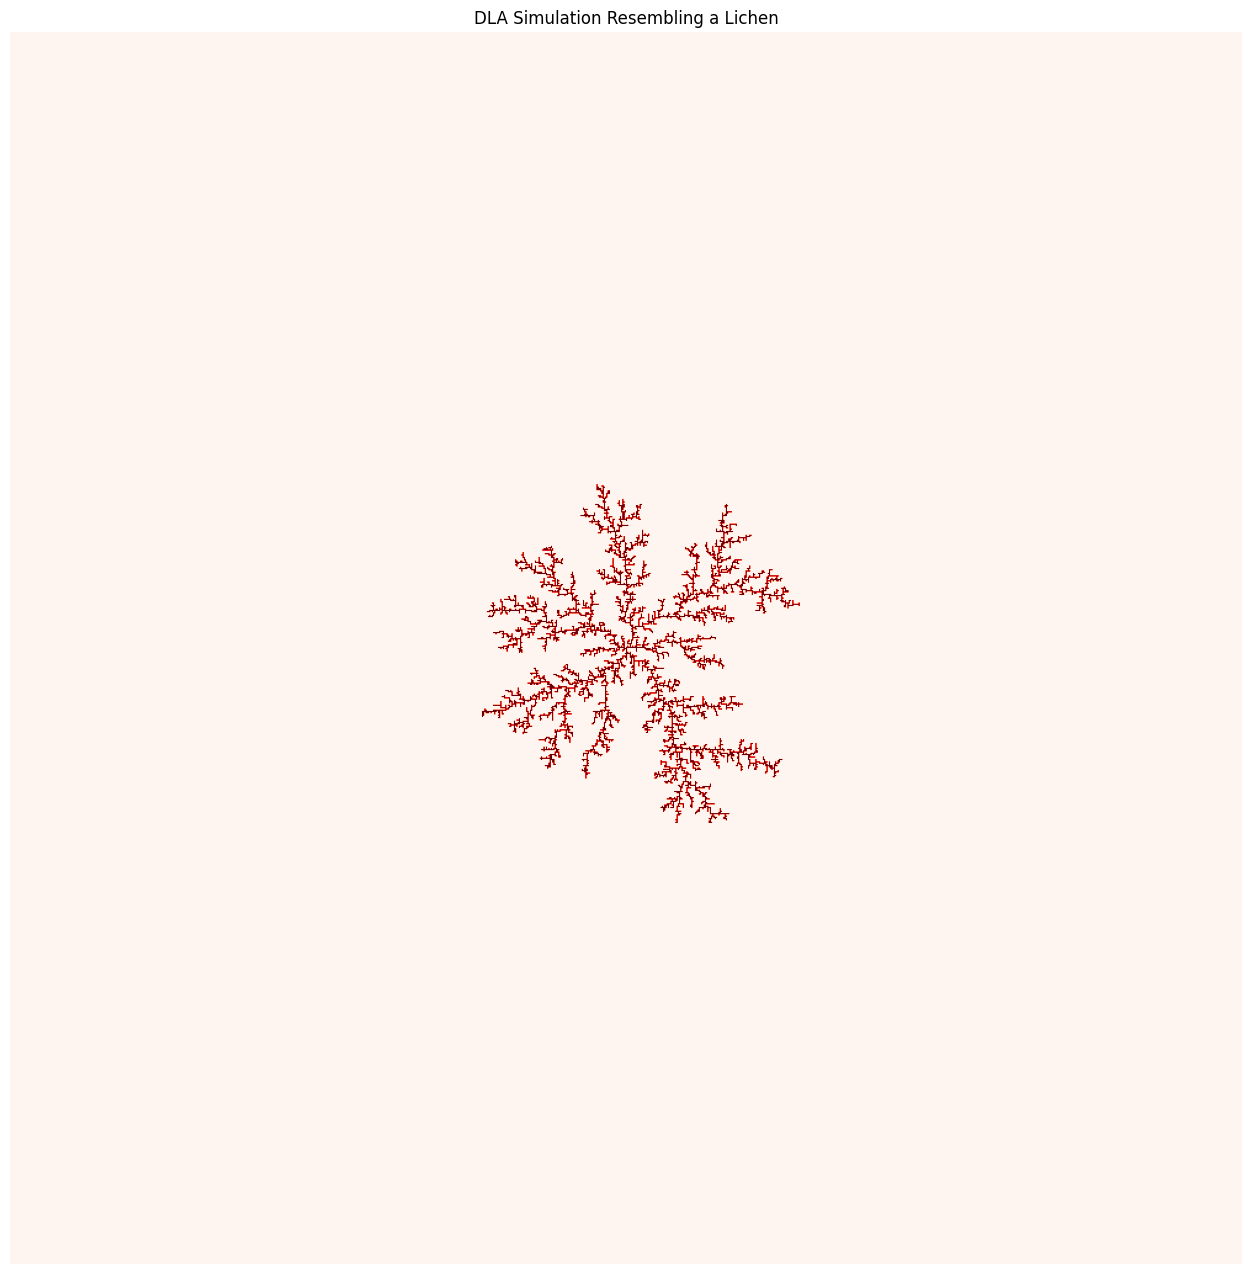

In [5]:
plt.figure(figsize=(16, 16))
plt.imshow(grid, cmap='Reds')
plt.axis('off')
plt.title('DLA Simulation Resembling a Lichen')
plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from numba import njit

# DLA Simulation Function
@njit
def dla_simulation(grid_size, num_particles, max_steps):
    grid = np.zeros((grid_size, grid_size), dtype=np.float64)
    center = grid_size // 2
    grid[center, center] = 1

    for _ in range(num_particles):
        angle = 2 * np.pi * np.random.rand()
        x = int(center + (grid_size // 2 - 1) * np.cos(angle))
        y = int(center + (grid_size // 2 - 1) * np.sin(angle))

        for _ in range(max_steps):
            direction = np.random.randint(4)
            if direction == 0 and x > 0:
                x -= 1
            elif direction == 1 and x < grid_size - 1:
                x += 1
            elif direction == 2 and y > 0:
                y -= 1
            elif direction == 3 and y < grid_size - 1:
                y += 1

            if (grid[(x - 1) % grid_size, y] == 1 or
                grid[(x + 1) % grid_size, y] == 1 or
                grid[x, (y - 1) % grid_size] == 1 or
                grid[x, (y + 1) % grid_size] == 1):
                grid[x, y] = 1
                break

    return grid

# Plotting Function
def plot_dla(grid_size, num_particles, max_steps):
    grid = dla_simulation(grid_size, num_particles, max_steps)
    plt.figure(figsize=(16, 16))
    plt.imshow(grid, cmap='Reds')
    plt.axis('off')
    plt.title(f'DLA Simulation\nGrid Size: {grid_size}, Particles: {num_particles}, Max Steps: {max_steps}')
    plt.show()

# Sliders for interactive inputs
grid_size_slider = widgets.IntSlider(min=100, max=800, step=50, value=500, description='Grid Size')
num_particles_slider = widgets.IntSlider(min=1000, max=100000, step=5000, value=50000, description='Particles')
max_steps_slider = widgets.IntSlider(min=1000, max=2000000, step=1000, value=10000, description='Max Steps')

# Interactive widget display
interact(plot_dla, 
         grid_size=grid_size_slider, 
         num_particles=num_particles_slider, 
         max_steps=max_steps_slider)


interactive(children=(IntSlider(value=500, description='Grid Size', max=800, min=100, step=50), IntSlider(valu…

<function __main__.plot_dla(grid_size, num_particles, max_steps)>

In [7]:
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact
from numba import njit

# DLA Simulation Function
@njit
def dla_simulation(grid_size, num_particles, max_steps):
    grid = np.zeros((grid_size, grid_size), dtype=np.float64)
    center = grid_size // 2
    grid[center, center] = 1

    for _ in range(num_particles):
        angle = 2 * np.pi * np.random.rand()
        x = int(center + (grid_size // 2 - 1) * np.cos(angle))
        y = int(center + (grid_size // 2 - 1) * np.sin(angle))

        for _ in range(max_steps):
            direction = np.random.randint(4)
            if direction == 0 and x > 0:
                x -= 1
            elif direction == 1 and x < grid_size - 1:
                x += 1
            elif direction == 2 and y > 0:
                y -= 1
            elif direction == 3 and y < grid_size - 1:
                y += 1

            if (grid[(x - 1) % grid_size, y] == 1 or
                grid[(x + 1) % grid_size, y] == 1 or
                grid[x, (y - 1) % grid_size] == 1 or
                grid[x, (y + 1) % grid_size] == 1):
                grid[x, y] = 1
                break

    return grid

# Plotting Function using Plotly
def plot_dla(grid_size, num_particles, max_steps):
    grid = dla_simulation(grid_size, num_particles, max_steps)
    
    fig = go.Figure(data=go.Heatmap(
        z=grid, 
        colorscale='Greys',
        showscale=False
    ))

    fig.update_layout(
        title=f'DLA Simulation\nGrid Size: {grid_size}, Particles: {num_particles}, Max Steps: {max_steps}',
        width=800,
        height=800,
        xaxis=dict(showgrid=False, zeroline=False, visible=False),
        yaxis=dict(showgrid=False, zeroline=False, visible=False),
    )

    fig.show()

# Sliders for interactive inputs
grid_size_slider = widgets.IntSlider(min=100, max=800, step=50, value=500, description='Grid Size')
num_particles_slider = widgets.IntSlider(min=1000, max=1000000, step=5000, value=50000, description='Particles')
max_steps_slider = widgets.IntSlider(min=1000, max=1000000, step=1000, value=10000, description='Max Steps')

# Interactive widget display
interact(plot_dla, 
         grid_size=grid_size_slider, 
         num_particles=num_particles_slider, 
         max_steps=max_steps_slider)


interactive(children=(IntSlider(value=500, description='Grid Size', max=800, min=100, step=50), IntSlider(valu…

<function __main__.plot_dla(grid_size, num_particles, max_steps)>

## DLA Model Resembling a Saprophyte

In [8]:
@njit(parallel=True)
def dla_simulation_saprophyte(grid, num_particles, max_steps):
    grid_size = grid.shape[0]

    for n in prange(num_particles):
        # Start the particle at a random position at the bottom
        x = np.random.randint(0, grid_size)
        y = grid_size - 1

        for _ in range(max_steps):
            # Introduce upward bias
            prob = np.random.rand()
            if prob < 0.7 and y > 0:
                y -= 1  # Up
            elif prob < 0.85 and x > 0:
                x -= 1  # Left
            elif prob < 1.0 and x < grid_size - 1:
                x += 1  # Right

            # Check if the particle is adjacent to the cluster
            if (grid[x, (y - 1) % grid_size] == 1 or
                grid[(x - 1) % grid_size, y] == 1 or
                grid[(x + 1) % grid_size, y] == 1):
                grid[x, y] = 1
                break
            # Break if out of bounds
            if y <= 0:
                break


In [9]:
# Initialize the grid
grid_saprophyte = np.zeros((grid_size, grid_size), dtype=np.uint8)

# Set the seed particles at the bottom row
grid_saprophyte[:, grid_size - 1] = 1

# Run the DLA simulation with upward bias
dla_simulation_saprophyte(grid_saprophyte, num_particles, max_steps)


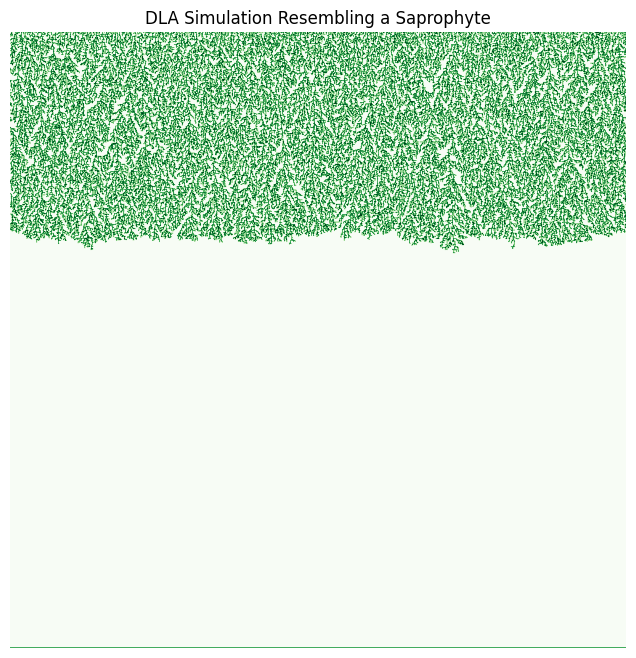

In [10]:
plt.figure(figsize=(8, 8))
plt.imshow(grid_saprophyte.T, cmap='Greens')
plt.axis('off')
plt.title('DLA Simulation Resembling a Saprophyte')
plt.show()

 ## DLA Model Resembling a Bryophyte

In [11]:
@njit(parallel=True)
def dla_simulation_bryophyte(grid, num_particles, max_steps):
    grid_size = grid.shape[0]
    center = grid_size // 2

    for n in prange(num_particles):
        # Start the particle near the bottom center
        x = np.random.randint(center - 50, center + 50)
        y = grid_size - 1

        for _ in range(max_steps):
            # Introduce upward and lateral bias
            prob = np.random.rand()
            if prob < 0.6 and y > 0:
                y -= 1  # Up
            elif prob < 0.8 and x > 0:
                x -= 1  # Left
            elif prob < 1.0 and x < grid_size - 1:
                x += 1  # Right

            # Check if the particle is adjacent to the cluster
            if (grid[x, (y - 1) % grid_size] == 1 or
                grid[(x - 1) % grid_size, y] == 1 or
                grid[(x + 1) % grid_size, y] == 1):
                # Introduce lower sticking probability to encourage branching
                if np.random.rand() < 0.5:
                    grid[x, y] = 1
                    break
            # Break if out of bounds
            if y <= 0:
                break

In [12]:
# Initialize the grid
grid_bryophyte = np.zeros((grid_size, grid_size), dtype=np.uint8)

# Set the seed particles at the bottom center
grid_bryophyte[center - 5:center + 5, grid_size - 1] = 1

# Run the DLA simulation for bryophyte
dla_simulation_bryophyte(grid_bryophyte, num_particles, max_steps)


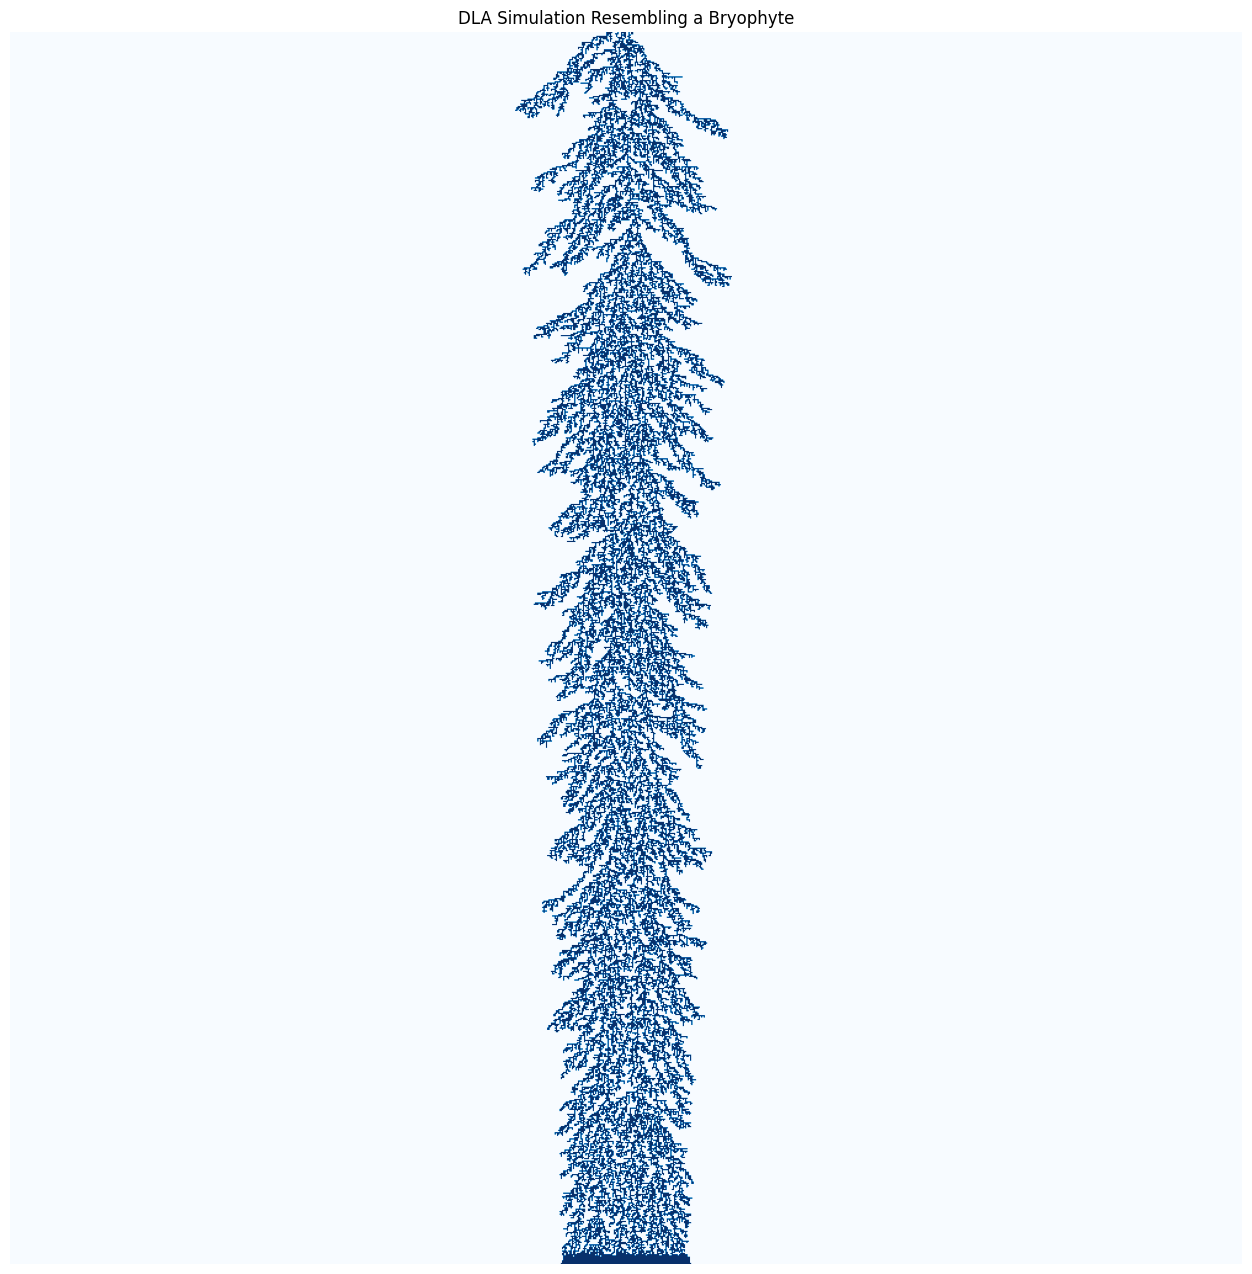

In [13]:
plt.figure(figsize=(16, 16))
plt.imshow(grid_bryophyte.T, cmap='Blues')
plt.axis('off')
plt.title('DLA Simulation Resembling a Bryophyte')
plt.show()
